### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad(y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [53]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares", 24, 1.78),("Gina Garrido", 57, 1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez", 26, 1.81),("Javier Araiz Miranda", 30, 1.80)]

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [86]:
lista = pd.DataFrame(data=lista_alumnos, columns=("Name", "Age", "Height"))

In [87]:
lista

,Name,Age,Height
0,Clara Piniella,30,1.66
1,Daniel Walker,34,1.87
2,Leonardo Frazzetto,31,1.78
3,Xinru Yang,24,1.60
4,Jorge Garcia,28,1.79
5,Jonathan Suárez,27,1.86
6,Marina Serrano,25,1.54
7,Karina Inche,30,1.61
8,Mary Meza,32,1.52
9,Borja Puig,37,1.82


In [85]:
heat = lista[['Height', 'Age']]
heat

,Height,Age
0,1.66,60
1,1.87,68
2,1.78,62
3,1.60,48
4,1.79,56
5,1.86,54
6,1.54,50
7,1.61,60
8,1.52,64
9,1.82,74


In [88]:
X = lista["Height"]
y = lista["Age"]

In [89]:
X = X.to_numpy()
X

array([1.66, 1.87, 1.78, 1.6 , 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77,
       1.7 , 1.78, 1.63, 1.73, 1.85, 1.78, 1.7 , 1.64, 1.82, 1.81, 1.8 ])

In [91]:
X = X.reshape(-1, 1)

In [90]:
y = y.to_numpy()
y = y.reshape(-1, 1)

In [92]:
ageheight1 = LinearRegression(n_jobs=-1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

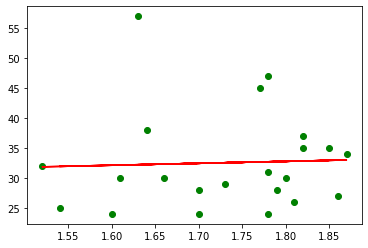

In [27]:
ageheight1.fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, ageheight1.predict(X), color='red')

# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?

No,  es una mala tecnica porque sabemos que la altura no tiene una relacion con la edad.

# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [31]:
ageheight1.intercept_

array([26.91572719])

In [33]:
ageheight1.coef_

array([[3.25417766]])

At birth (0 years old) this model predicts that you should be 26 cm tall and every year.

In [74]:
predictionsah = ageheight1.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predictionsah))
print('MSE:', metrics.mean_squared_error(y_test, predictionsah))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsah)))

MAE: 27.369936835372187
MSE: 848.64934256789
RMSE: 29.131586681262146


As a height at birth, this model is incorrect, as is the MAE, as is the MSE as is the RMSE. A linear model is not adecuate for this type of problem.

# Representa la matriz de correlación, ¿los datos están correlacionados?

<AxesSubplot:>

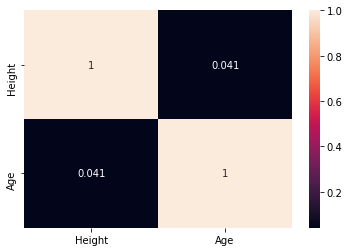

In [43]:
sns.heatmap(heat.corr(), annot=True)

# ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

In [45]:
lista.Height = lista.Height*2
lista

,Name,Age,Height
0,Clara Piniella,30,3.32
1,Daniel Walker,34,3.74
2,Leonardo Frazzetto,31,3.56
3,Xinru Yang,24,3.20
4,Jorge Garcia,28,3.58
5,Jonathan Suárez,27,3.72
6,Marina Serrano,25,3.08
7,Karina Inche,30,3.22
8,Mary Meza,32,3.04
9,Borja Puig,37,3.64


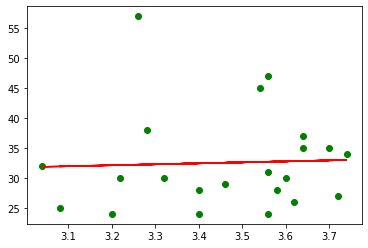

In [46]:
X = lista["Height"]
y = lista["Age"]
X = X.to_numpy()
X = X.reshape(-1, 1)
y = y.to_numpy()
y = y.reshape(-1, 1)
ageheight2 = LinearRegression(n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
ageheight2.fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, ageheight2.predict(X), color='red')

In [52]:
print("Height at birth: (cm) ",ageheight2.intercept_[0])
print("Coef: ", ageheight2.coef_[0][0])
predictions = ageheight2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Height at birth: (cm)  26.91572719277208
Coef:  1.6270888302550477
MAE: 7.125929479491487
MSE: 52.79530636554254
RMSE: 7.266037872564562


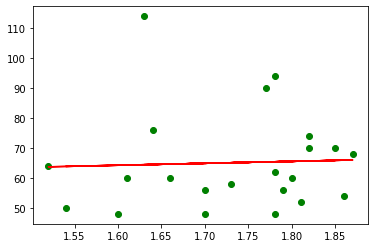

In [56]:
lista.Age = lista.Age*2
X = lista["Height"]
y = lista["Age"]
X = X.to_numpy()
X = X.reshape(-1, 1)
y = y.to_numpy()
y = y.reshape(-1, 1)
age2height = LinearRegression(n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
age2height.fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, age2height.predict(X), color='red')

In [57]:
print("Height at birth: (cm) ",age2height.intercept_[0])
print("Coef: ", age2height.coef_[0][0])
predictions = age2height.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Height at birth: (cm)  53.83145438554416
Coef:  6.508355321020191
MAE: 10.240697209562649
MSE: 122.92422723166298
RMSE: 11.087119879917552


In [72]:
print("Train Score: ", ageheight1.score(X_train, y_train)*100)
print("Test Score: ", ageheight1.score(X_test, y_test)*100)
print("Total Score: ", ageheight1.score(X, y)*100)
print("---------")
print("Height x 2")
print("Train Score: ", ageheight2.score(X_train, y_train)*100)
print("Test Score: ", ageheight2.score(X_test, y_test)*100)
print("Total Score: ", ageheight2.score(X, y)*100)
print("---------")
print("Age x 2")
print("Train Score: ", age2height.score(X_train, y_train)*100)
print("Test Score: ", age2height.score(X_test, y_test)*100)
print("Total Score: ", age2height.score(X, y)*100)

Train Score:  -385.6842761987443
Test Score:  -716.0089832383559
Total Score:  -401.2409698445609
---------
Height x 2
Train Score:  -451.613657194269
Test Score:  -876.3681526399896
Total Score:  -473.72362142665406
---------
Age x 2
Train Score:  -1.2396556136686998
Test Score:  -18.19637233813749
Total Score:  0.16590884477361012
